In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\datasets\\Loan_dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Looking for NaN values

In [69]:
df.isnull().mean()*100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [70]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    str    
 1   Gender             356 non-null    str    
 2   Married            367 non-null    str    
 3   Dependents         357 non-null    str    
 4   Education          367 non-null    str    
 5   Self_Employed      344 non-null    str    
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    str    
dtypes: float64(3), int64(2), str(7)
memory usage: 34.5 KB


In [71]:
df=df.drop(columns=df.columns[df.isnull().sum()==0])
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            356 non-null    str    
 1   Dependents        357 non-null    str    
 2   Self_Employed     344 non-null    str    
 3   LoanAmount        362 non-null    float64
 4   Loan_Amount_Term  361 non-null    float64
 5   Credit_History    338 non-null    float64
dtypes: float64(3), str(3)
memory usage: 17.3 KB


Columns having nan values less than 5 percent 

In [72]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['Gender', 'Dependents', 'LoanAmount', 'Loan_Amount_Term']

Percentage of data we will loose if we drop the nan rows of columns present in cols

In [73]:
data_lost=100-(len(df[cols].dropna())/len(df)*100)
print(data_lost,'%')

8.174386920980922 %


In [74]:
new_df=df.dropna(subset=cols)
df.shape,new_df.shape

((367, 6), (337, 6))

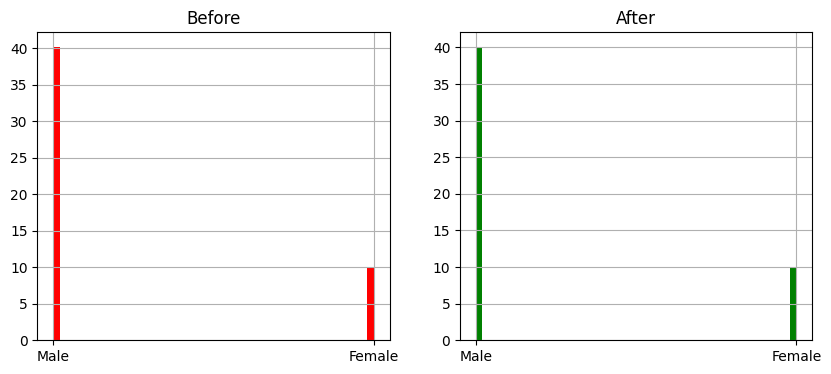

In [75]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['Gender'].hist(bins=50, ax=ax1, density=True, color='red')
ax1.set_title("Before")
ax2 = fig.add_subplot(122)
new_df['Gender'].hist(bins=50, ax=ax2, density=True, color='green')
ax2.set_title("After")
plt.show()

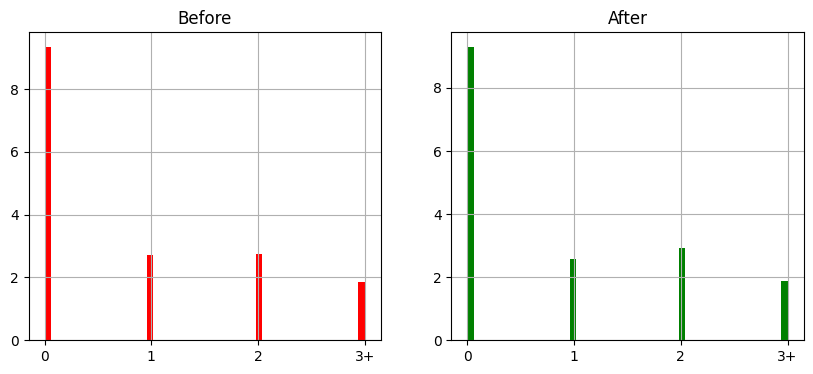

In [76]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['Dependents'].hist(bins=50, ax=ax1, density=True, color='red')
ax1.set_title("Before")
ax2 = fig.add_subplot(122)
new_df['Dependents'].hist(bins=50, ax=ax2, density=True, color='green')
ax2.set_title("After")
plt.show()

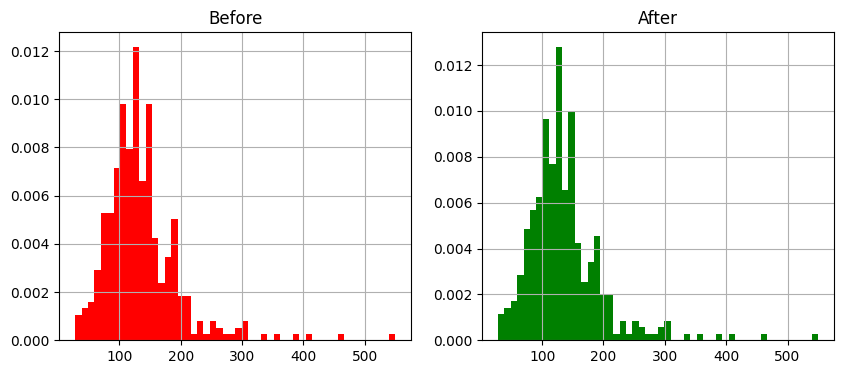

In [77]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['LoanAmount'].hist(bins=50, ax=ax1, density=True, color='red')
ax1.set_title("Before")
ax2 = fig.add_subplot(122)
new_df['LoanAmount'].hist(bins=50, ax=ax2, density=True, color='green')
ax2.set_title("After")
plt.show()

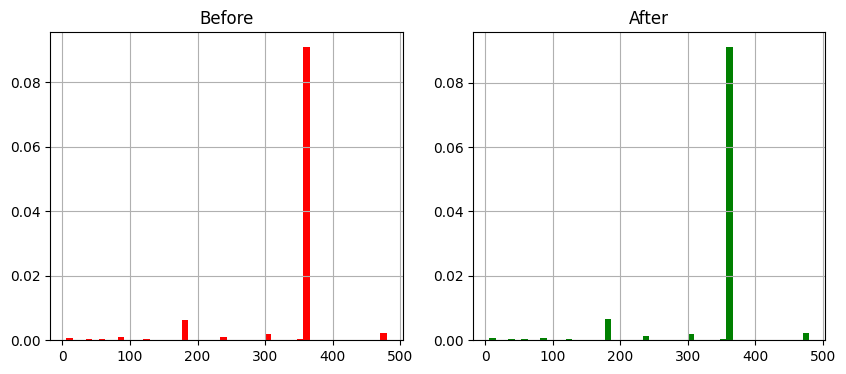

In [78]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['Loan_Amount_Term'].hist(bins=50, ax=ax1, density=True, color='red')
ax1.set_title("Before")
ax2 = fig.add_subplot(122)
new_df['Loan_Amount_Term'].hist(bins=50, ax=ax2, density=True, color='green')
ax2.set_title("After")
plt.show()

<Axes: ylabel='Density'>

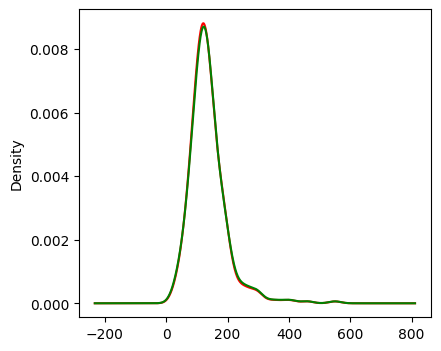

In [79]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['LoanAmount'].plot.density(color='red') #before
new_df['LoanAmount'].plot.density(color='green') #after

<Axes: ylabel='Density'>

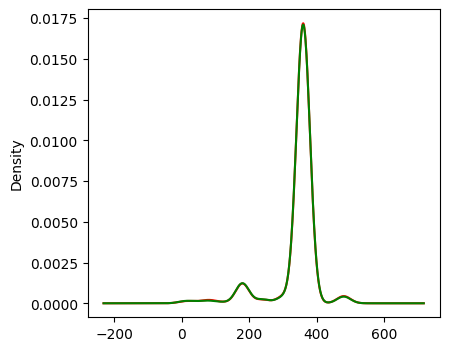

In [80]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['Loan_Amount_Term'].plot.density(color='red') #before
new_df['Loan_Amount_Term'].plot.density(color='green') #after

In [86]:
df['Self_Employed'].unique()

<StringArray>
['No', 'Yes', nan]
Length: 3, dtype: str

In [87]:
df['Credit_History'].unique()

array([ 1., nan,  0.])

In [97]:
new_df['Self_Employed']=new_df['Self_Employed'].fillna('Missing', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17696\2593953246.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  new_df['Self_Employed']=new_df['Self_Employed'].fillna('Missing', inplace=True)


In [98]:
new_df.info()

<class 'pandas.DataFrame'>
Index: 337 entries, 0 to 366
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            337 non-null    str    
 1   Dependents        337 non-null    str    
 2   Self_Employed     337 non-null    str    
 3   LoanAmount        337 non-null    float64
 4   Loan_Amount_Term  337 non-null    float64
 5   Credit_History    311 non-null    float64
dtypes: float64(3), str(3)
memory usage: 18.4 KB


In [ ]:
new_df['Credit_History']=new_df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17696\1987948787.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  new_df['Credit_History']=new_df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [101]:
new_df.info()

<class 'pandas.DataFrame'>
Index: 337 entries, 0 to 366
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            337 non-null    str    
 1   Dependents        337 non-null    str    
 2   Self_Employed     337 non-null    str    
 3   LoanAmount        337 non-null    float64
 4   Loan_Amount_Term  337 non-null    float64
 5   Credit_History    337 non-null    float64
dtypes: float64(3), str(3)
memory usage: 18.4 KB


Graph plotation of credit history before and after handling nan values

<Axes: ylabel='Density'>

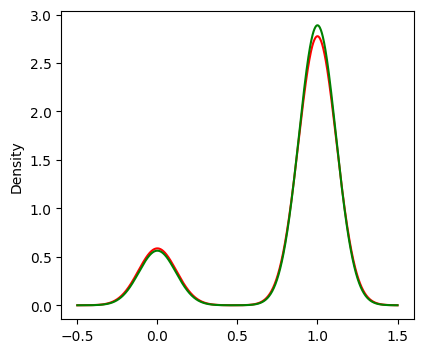

In [102]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['Credit_History'].plot.density(color='red') #before
new_df['Credit_History'].plot.density(color='green') #after


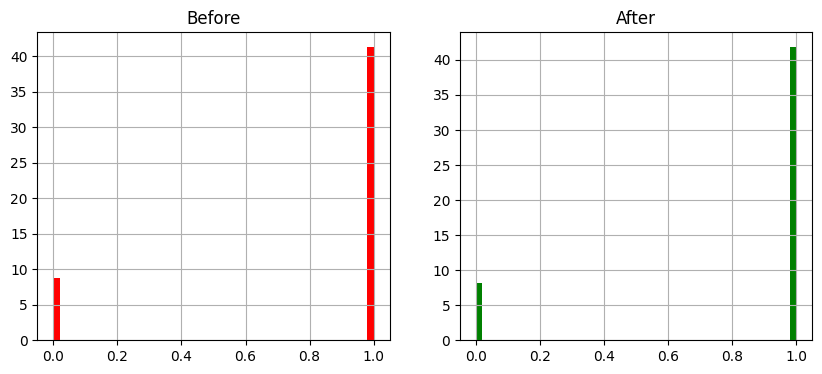

In [104]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['Credit_History'].hist(bins=50, ax=ax1, density=True, color='red')
ax1.set_title("Before")
ax2 = fig.add_subplot(122)
new_df['Credit_History'].hist(bins=50, ax=ax2, density=True, color='green')
ax2.set_title("After")
plt.show()